In [58]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [3]:
orders = pd.read_csv('orders.csv')
customers = pd.read_csv('customers.csv')

In [6]:
orders

,id,order_date,ship_mode,customer_id,sales
0,100006,2014-09-07,Standard,DK-13375,377.970
1,100090,2014-07-08,Standard,EB-13705,699.192
2,100293,2014-03-14,Standard,NF-18475,91.056
3,100328,2014-01-28,Standard,JC-15340,3.928
4,100363,2014-04-08,Standard,JM-15655,21.376
...,...,...,...,...,...
5004,168802,2017-11-03,Standard,JO-15145,18.368
5005,169320,2017-07-23,Second,LH-16900,171.430
5006,169488,2017-09-07,First,AA-10375,56.860
5007,169502,2017-08-28,Standard,MG-17650,113.410


In [47]:
orders.order_date = pd.to_datetime(orders.order_date)

In [33]:
orders.isna().sum()

id             0
order_date     0
ship_mode      0
customer_id    0
sales          0
dtype: int64

In [34]:
customers.isna().sum()

id         0
name       0
segment    0
state      0
city       0
dtype: int64

In [35]:
orders.ship_mode.value_counts()

Standard    2994
Second       964
First        787
Same Day     264
Name: ship_mode, dtype: int64

In [40]:
orders.order_date.max()

Timestamp('2017-12-30 00:00:00')

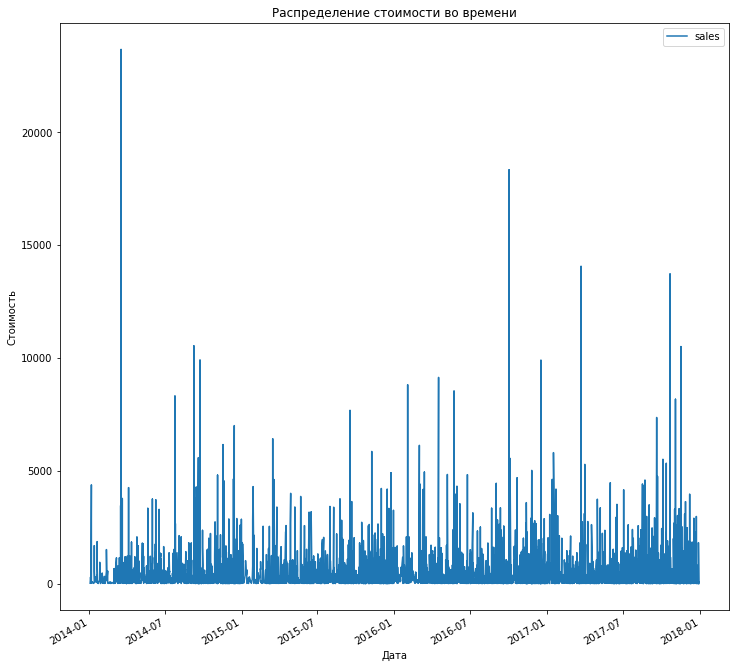

In [39]:
orders.plot(x='order_date', y='sales', figsize=(12,12))
plt.title('Распределение стоимости во времени')
plt.xlabel('Дата')
plt.ylabel('Стоимость')
plt.show()


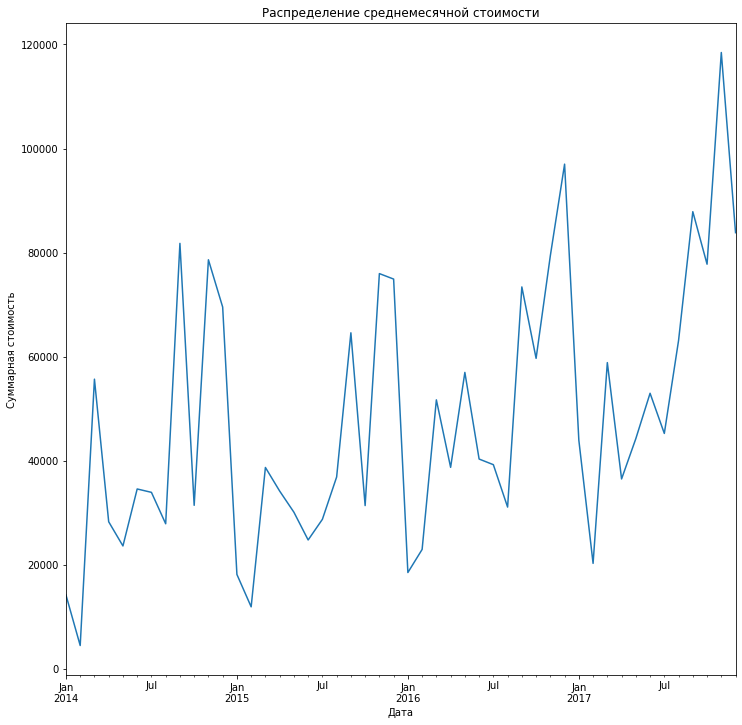

In [46]:
orders.set_index('order_date').resample('M')['sales'].sum().plot(figsize=(12,12))
plt.title('Распределение среднемесячной стоимости')
plt.xlabel('Дата')
plt.ylabel('Суммарная стоимость')
plt.show()

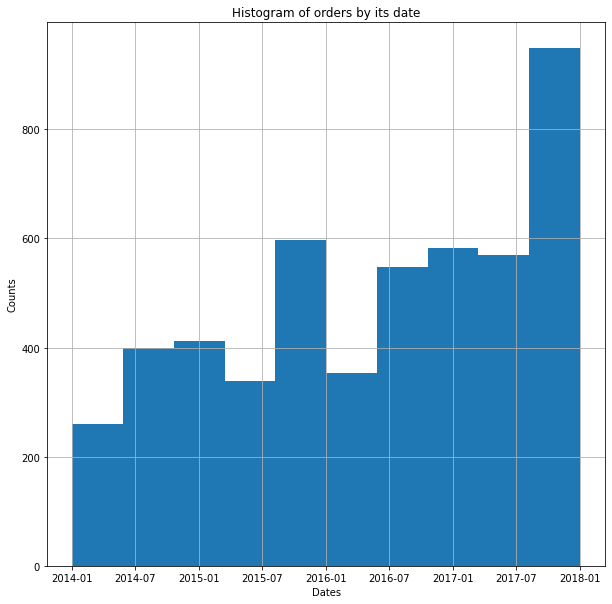

In [60]:
orders.order_date.hist(figsize=(10,10))
plt.title('Histogram of orders by its date')
plt.xlabel('Dates')
plt.ylabel('Counts')
plt.show()

In [49]:
orders.set_index('order_date').resample('Y')['sales'].sum()

order_date
2014-12-31    484247.4981
2015-12-31    470532.5090
2016-12-31    609205.5980
2017-12-31    733215.2552
Freq: A-DEC, Name: sales, dtype: float64

In [104]:
cohorts = orders.merge(customers, left_on='customer_id', right_on='id').groupby('customer_id').agg({
    'order_date': 'min'
})

In [105]:
cohorts.head()

,order_date
customer_id,
AA-10315,2014-03-31
AA-10375,2014-04-21
AA-10480,2014-05-04
AA-10645,2014-06-22
AB-10015,2014-02-18


In [124]:
cohorts['order_month'] = cohorts.order_date.dt.strftime('%Y-%m')

In [125]:
cohorts.head()

,customer_id,order_date,order_month
0,AA-10315,2014-03-31,2014-03
1,AA-10375,2014-04-21,2014-04
2,AA-10480,2014-05-04,2014-05
3,AA-10645,2014-06-22,2014-06
4,AB-10015,2014-02-18,2014-02


In [126]:
cohorts = cohorts.reset_index()

In [127]:
cohorts.head()

,index,customer_id,order_date,order_month
0,0,AA-10315,2014-03-31,2014-03
1,1,AA-10375,2014-04-21,2014-04
2,2,AA-10480,2014-05-04,2014-05
3,3,AA-10645,2014-06-22,2014-06
4,4,AB-10015,2014-02-18,2014-02


In [128]:
customers.id.nunique()

793

In [129]:
df = pd.merge(orders, customers, left_on= 'customer_id', right_on='id', suffixes=('_order', '_customer'))

In [130]:
df.shape

(5009, 10)

In [131]:
df.drop(columns=['id_customer'], inplace=True)

In [132]:
df.head()

,id_order,order_date,ship_mode,customer_id,sales,name,segment,state,city
0,100006,2014-09-07,Standard,DK-13375,377.970,Dennis Kane,Consumer,Ohio,Marion
1,131884,2015-12-06,Same Day,DK-13375,594.002,Dennis Kane,Consumer,Ohio,Marion
2,145065,2015-12-12,First,DK-13375,32.308,Dennis Kane,Consumer,Ohio,Marion
3,133046,2017-07-27,Second,DK-13375,297.990,Dennis Kane,Consumer,Ohio,Marion
4,165099,2017-12-11,First,DK-13375,1.392,Dennis Kane,Consumer,Ohio,Marion


In [133]:
df.rename(columns={'id_order': 'order_id'}, inplace=True)

In [134]:
df.head()

,order_id,order_date,ship_mode,customer_id,sales,name,segment,state,city
0,100006,2014-09-07,Standard,DK-13375,377.970,Dennis Kane,Consumer,Ohio,Marion
1,131884,2015-12-06,Same Day,DK-13375,594.002,Dennis Kane,Consumer,Ohio,Marion
2,145065,2015-12-12,First,DK-13375,32.308,Dennis Kane,Consumer,Ohio,Marion
3,133046,2017-07-27,Second,DK-13375,297.990,Dennis Kane,Consumer,Ohio,Marion
4,165099,2017-12-11,First,DK-13375,1.392,Dennis Kane,Consumer,Ohio,Marion


In [135]:
df = df.merge(cohorts, left_on='customer_id', right_on='customer_id')

In [137]:
df.shape

(5009, 12)

In [138]:
df.head()

,order_id,order_date_x,ship_mode,customer_id,sales,name,segment,state,city,index,order_date_y,order_month
0,100006,2014-09-07,Standard,DK-13375,377.970,Dennis Kane,Consumer,Ohio,Marion,216,2014-09-07,2014-09
1,131884,2015-12-06,Same Day,DK-13375,594.002,Dennis Kane,Consumer,Ohio,Marion,216,2014-09-07,2014-09
2,145065,2015-12-12,First,DK-13375,32.308,Dennis Kane,Consumer,Ohio,Marion,216,2014-09-07,2014-09
3,133046,2017-07-27,Second,DK-13375,297.990,Dennis Kane,Consumer,Ohio,Marion,216,2014-09-07,2014-09
4,165099,2017-12-11,First,DK-13375,1.392,Dennis Kane,Consumer,Ohio,Marion,216,2014-09-07,2014-09


In [148]:
unique_values, counts =  np.unique(df.city, return_counts=True)

In [149]:
for value, counts in  zip(unique_values, counts):
    print(value, '-', counts)

Akron - 19
Albuquerque - 7
Allen - 4
Amarillo - 7
Apple Valley - 3
Arlington - 34
Arlington Heights - 2
Arvada - 9
Asheville - 10
Atlanta - 4
Auburn - 25
Aurora - 80
Austin - 10
Baltimore - 3
Belleville - 5
Bloomington - 6
Bossier City - 12
Bowling Green - 11
Boynton Beach - 6
Brentwood - 9
Bridgeton - 5
Bristol - 17
Broomfield - 10
Brownsville - 13
Buffalo - 13
Burlington - 17
Carlsbad - 9
Carrollton - 5
Cary - 4
Chapel Hill - 8
Charlotte - 36
Charlottesville - 9
Chester - 20
Chicago - 160
Cincinnati - 36
Clarksville - 4
Cleveland - 12
Clinton - 11
College Station - 7
Colorado Springs - 8
Columbia - 24
Columbus - 138
Concord - 19
Conroe - 4
Coppell - 5
Costa Mesa - 5
Cottage Grove - 5
Cranston - 5
Dallas - 81
Daytona Beach - 10
Dearborn - 9
Decatur - 15
Deltona - 5
Denver - 20
Des Moines - 8
Detroit - 40
Dover - 30
Dublin - 13
Durham - 5
Eagan - 9
Edmond - 5
El Paso - 10
Elmhurst - 4
Encinitas - 7
Escondido - 3
Evanston - 11
Everett - 4
Fairfield - 13
Fayetteville - 18
Florence - 9
Fo

In [155]:
df.drop(columns=['order_date_y'], inplace=True)
df.rename(columns={'order_month': 'cohort',
                  'order_date_x': 'order_date'}, inplace=True)


In [156]:
df.head()

,order_id,order_date,ship_mode,customer_id,sales,name,segment,state,city,index,cohort
0,100006,2014-09-07,Standard,DK-13375,377.970,Dennis Kane,Consumer,Ohio,Marion,216,2014-09
1,131884,2015-12-06,Same Day,DK-13375,594.002,Dennis Kane,Consumer,Ohio,Marion,216,2014-09
2,145065,2015-12-12,First,DK-13375,32.308,Dennis Kane,Consumer,Ohio,Marion,216,2014-09
3,133046,2017-07-27,Second,DK-13375,297.990,Dennis Kane,Consumer,Ohio,Marion,216,2014-09
4,165099,2017-12-11,First,DK-13375,1.392,Dennis Kane,Consumer,Ohio,Marion,216,2014-09


In [158]:
(df['order_date'] - pd.to_datetime(df['cohort'])).dt.days.sort_values(ascending=False)

121    1452 days
122    1448 days
2457   1440 days
731    1437 days
168    1433 days
          ...   
1128      0 days
3593      0 days
3684      0 days
3749      0 days
4506      0 days
Length: 5009, dtype: timedelta64[ns]

In [99]:
df.shape

(795, 10)

In [221]:
df['is_new_client'] = ((df['order_date'] - pd.to_datetime(df.cohort)).dt.days <= 45).astype(int)

In [222]:
df['is_new_client'].value_counts()

0    4143
1     866
Name: is_new_client, dtype: int64

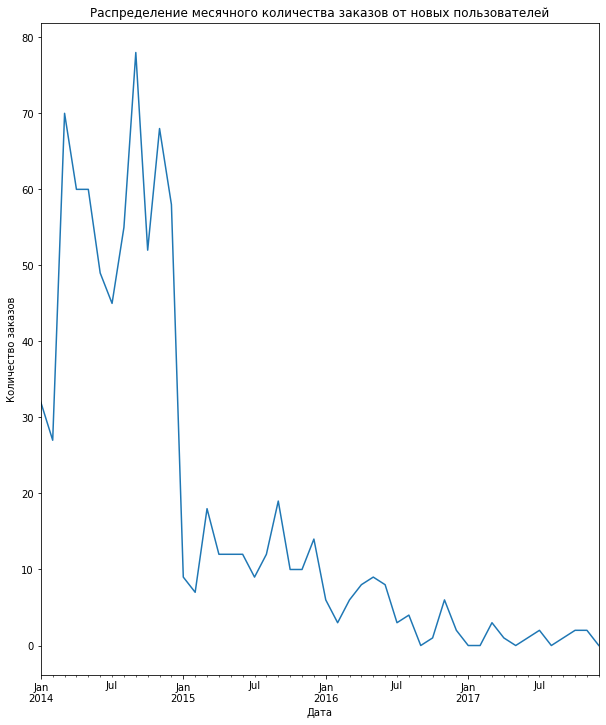

In [223]:
df.set_index('order_date').resample('M')['is_new_client'].sum().plot(figsize=(10,12))
plt.title('Распределение месячного количества заказов от новых пользователей')
plt.xlabel('Дата')
plt.ylabel('Количество заказов')
plt.show()

### Предварительный вывод

Выглядит так, что суммарная месячная стоимость в конце 2017 года не обусловлена покупками новых юзеров, а это значит, что мы можем не учитывать "привлечение" новых пользователей, то есть можем не учитывать затраты на это.

Построим retention

In [172]:
df['order_month'] = df.order_date.dt.strftime('%Y-%m')

In [444]:
current_year_mask = (df['order_date'] >= '2017-01-01') & \
                    (df['order_date'] <= '2017-12-31') & \
                    (df['cohort'] >= '2017-01')
prev_year_mask = (df['order_date'] >= '2016-01-01') & \
                 (df['order_date'] <= '2016-12-31') & \
                 (df['cohort'] >= '2016-01')
two_prev_year_mask = (df['order_date'] >= '2014-01-01') & \
    (df['order_date'] <= '2015-12-31') & \
    (df['cohort'] >= '2014-01')

two_curr_year_mask = (df['order_date'] >= '2016-01-01') & \
                     (df['order_date'] <= '2017-12-31') & \
                     (df['cohort'] >= '2016-01')

print(f'Current year has {df[current_year_mask].shape[0]} objects!')
print(f'Previous year has {df[prev_year_mask].shape[0]} objects!')

Current year has 19 objects!
Previous year has 104 objects!


In [206]:
df['cohort'].unique()

array(['2014-09', '2014-07', '2014-03', '2014-01', '2014-04', '2014-05',
       '2014-11', '2014-10', '2014-12', '2014-08', '2014-06', '2014-02',
       '2015-01', '2015-04', '2015-09', '2015-06', '2015-05', '2015-08',
       '2015-10', '2015-03', '2015-02', '2015-11', '2015-07', '2015-12',
       '2016-11', '2016-05', '2016-04', '2016-06', '2016-08', '2016-01',
       '2016-02', '2016-07', '2016-10', '2016-12', '2016-03', '2017-11',
       '2017-07', '2017-03', '2017-10', '2017-04', '2017-06', '2017-09'],
      dtype=object)

In [250]:
df

,order_id,order_date,ship_mode,customer_id,sales,name,segment,state,city,index,cohort,is_new_client,order_month
0,100006,2014-09-07,Standard,DK-13375,377.970,Dennis Kane,Consumer,Ohio,Marion,216,2014-09,1,2014-09
1,131884,2015-12-06,Same Day,DK-13375,594.002,Dennis Kane,Consumer,Ohio,Marion,216,2014-09,0,2015-12
2,145065,2015-12-12,First,DK-13375,32.308,Dennis Kane,Consumer,Ohio,Marion,216,2014-09,0,2015-12
3,133046,2017-07-27,Second,DK-13375,297.990,Dennis Kane,Consumer,Ohio,Marion,216,2014-09,0,2017-07
4,165099,2017-12-11,First,DK-13375,1.392,Dennis Kane,Consumer,Ohio,Marion,216,2014-09,0,2017-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5004,168193,2017-03-06,Second,RM-19750,98.350,Roland Murray,Consumer,New York,New York City,650,2017-03,1,2017-03
5005,122140,2015-04-02,Standard,MO-17950,130.288,Michael Oakman,Consumer,Texas,Dallas,531,2015-04,1,2015-04
5006,166233,2017-07-03,Standard,MO-17950,24.000,Michael Oakman,Consumer,Texas,Dallas,531,2015-04,0,2017-07
5007,160150,2015-07-19,First,TS-21085,2.025,Thais Sissman,Consumer,Arizona,Phoenix,760,2015-07,1,2015-07


In [369]:
from itertools import product

In [440]:
def plot_retention_graph(df: pd.DataFrame) -> None:
    """
    :param: df - Dataframe, contain
    ['cohort', 'order_month', 'customer_id']
    Calc & plot retention graph via seaborn
    :return None
    """
    current_years = df.order_date.dt.year.unique()
    all_cohorts = []
    for year in current_years:
        for cohort_number in range(1, 13):
            if cohort_number <= 9:
                cohort_number = '0' + str(cohort_number)
            all_cohorts.append(f'{year}-{cohort_number}')
    cohort_groupped = df.groupby(['cohort', 'order_month']).agg(count=('customer_id', pd.Series.nunique))
    insert_index = set(product(all_cohorts, all_cohorts))
    set_to_add = set(filter(lambda x: x[1] >= x[0], insert_index - set(cohort_groupped.index.values)))
    zeros = np.zeros(shape=len(set_to_add))
    insert_index = pd.MultiIndex.from_tuples(set_to_add)
    add_cohorts = pd.DataFrame(zeros, index=insert_index, columns=['count'])
    cohort_groupped = pd.concat([cohort_groupped, add_cohorts])
    cohort_groupped = cohort_groupped.sort_index()
    cohort_groupped = cohort_groupped.groupby(level=0).apply(cohort_period)
    cohort_groupped.reset_index(inplace=True)
    cohort_groupped.set_index(['cohort', 'CohortPeriod'], inplace=True)
    cohort_group_size = cohort_groupped['count'].groupby(level=0).first()
    user_retention = cohort_groupped['count'].unstack(0).divide(cohort_group_size, axis=1)
    plt.figure(figsize=(24,24))
    user_retention.replace(np.nan, 0, inplace=True)
    sns.heatmap(user_retention.T, annot=True, fmt='.0%')
    return None

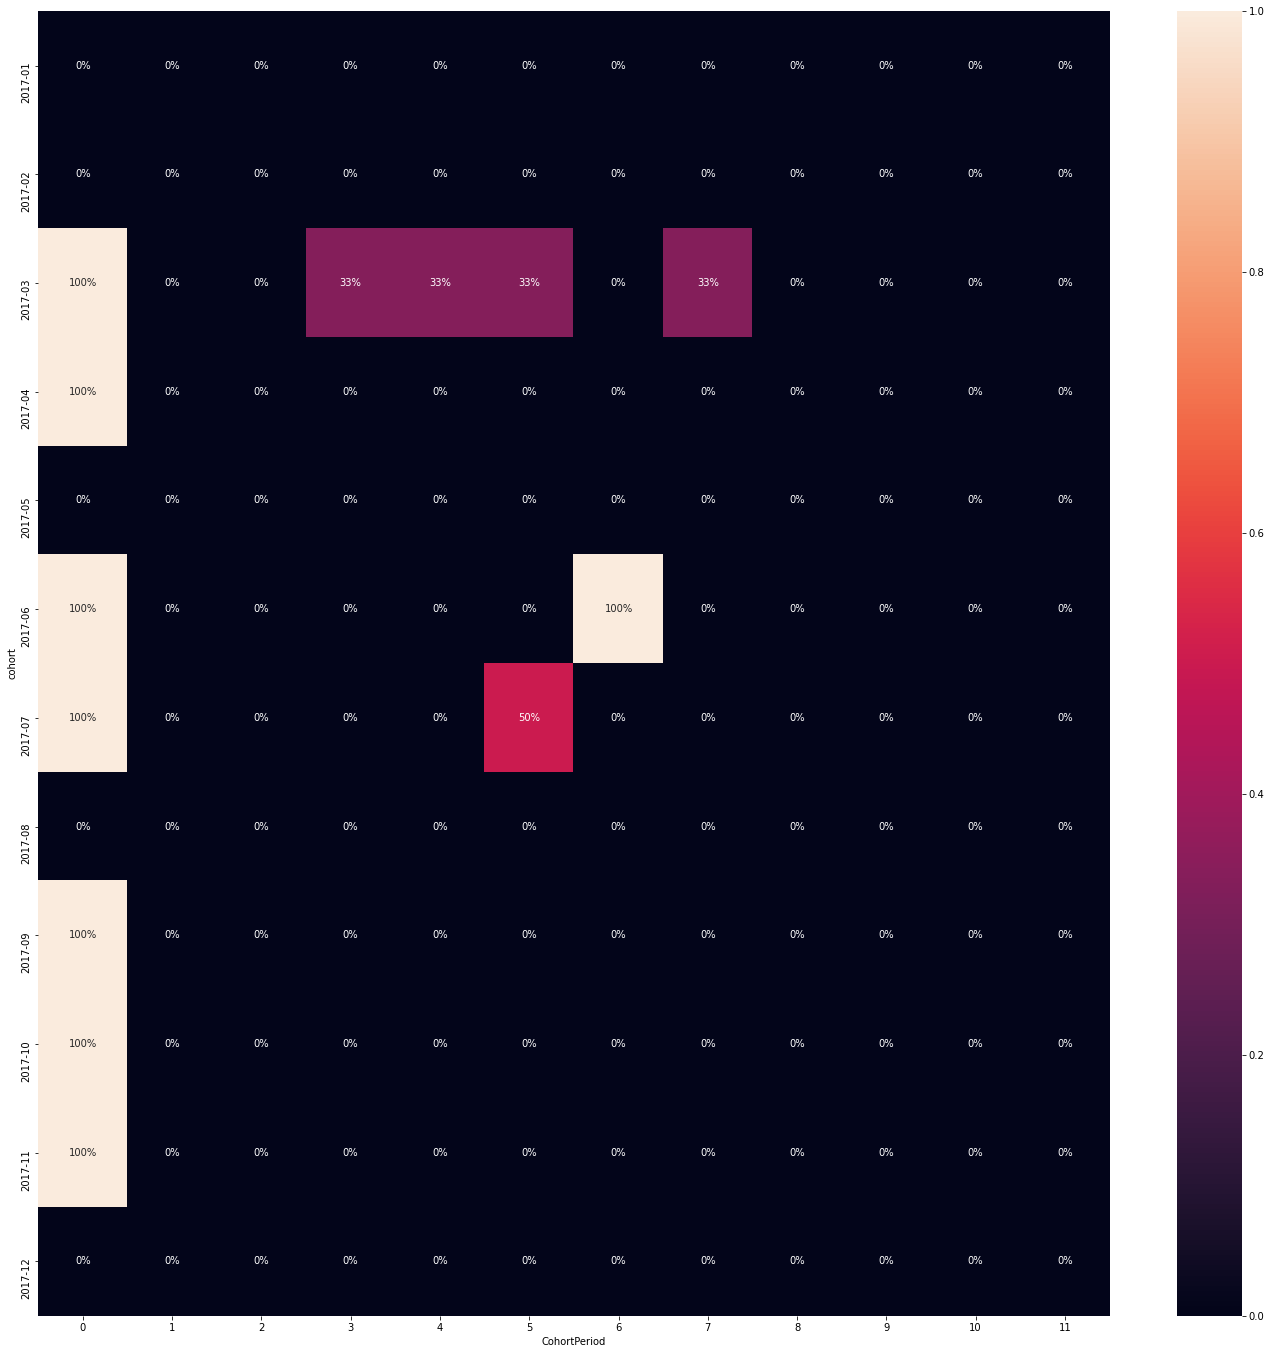

In [441]:
plot_retention_graph(df[current_year_mask])

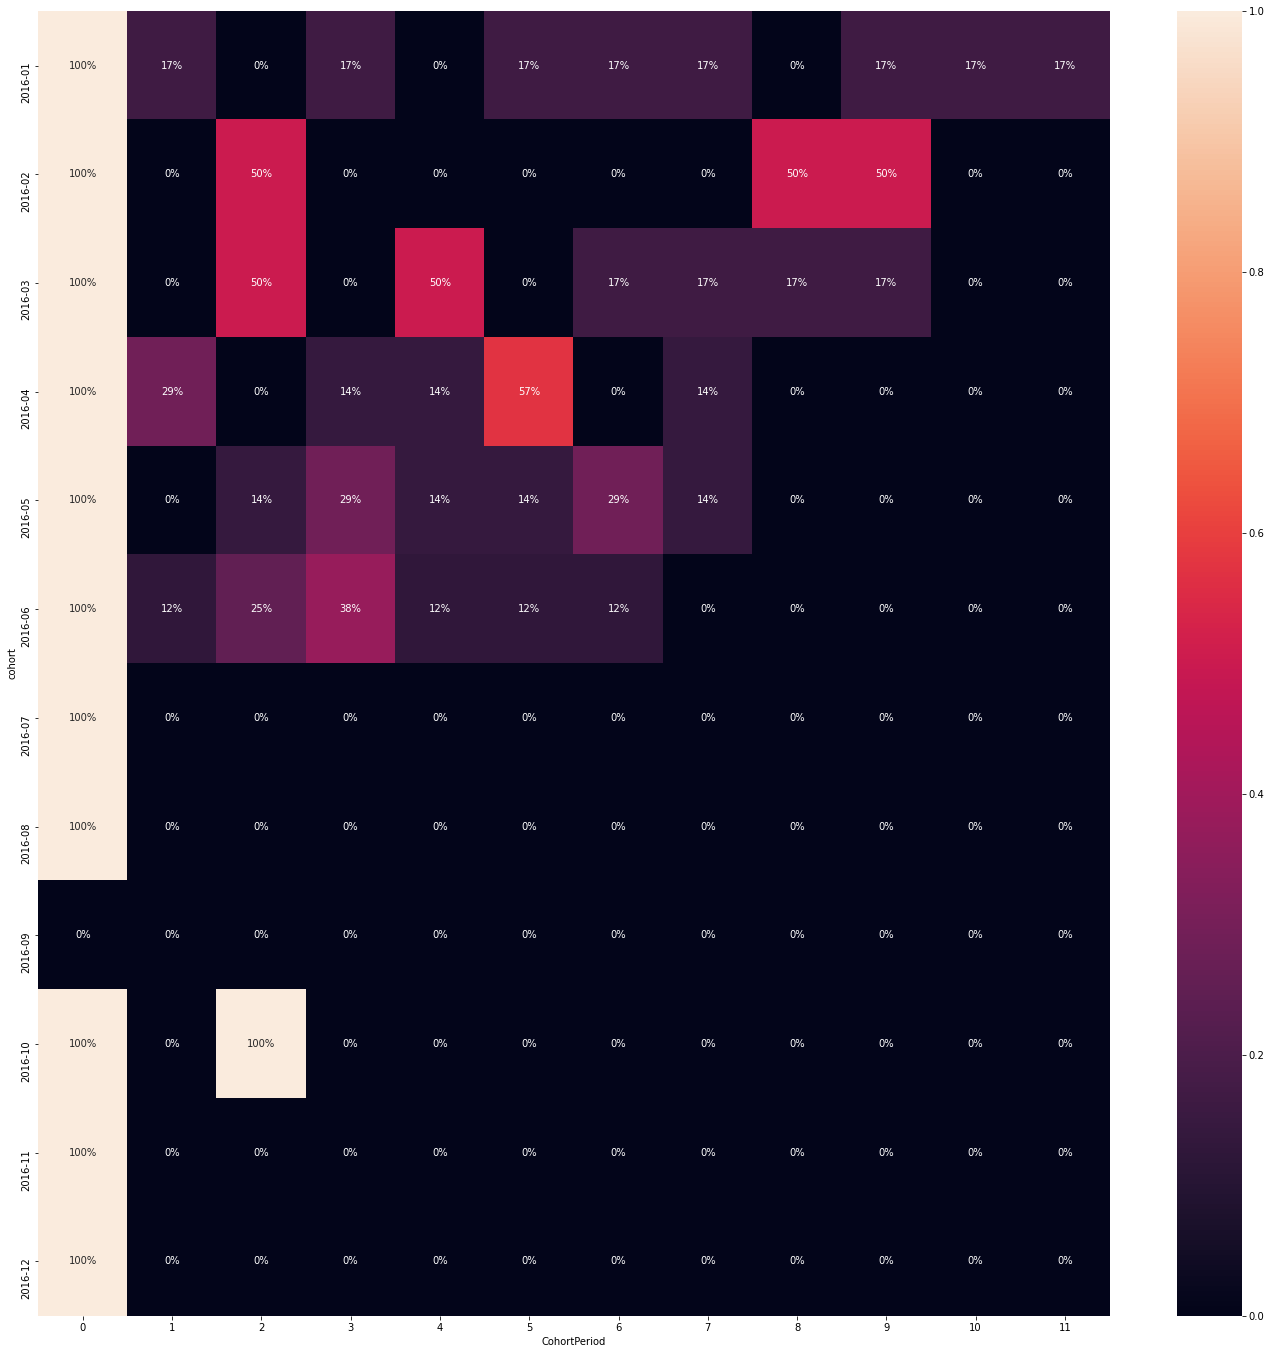

In [442]:
plot_retention_graph(df[prev_year_mask])

То есть для ряда когорт мы не имеем новых пользователей в 2017 и 2016 годах, тем ни менее, мы имеем прирост в конце 2017 года, который тогда должен быть обусловлен старыми пользователями.

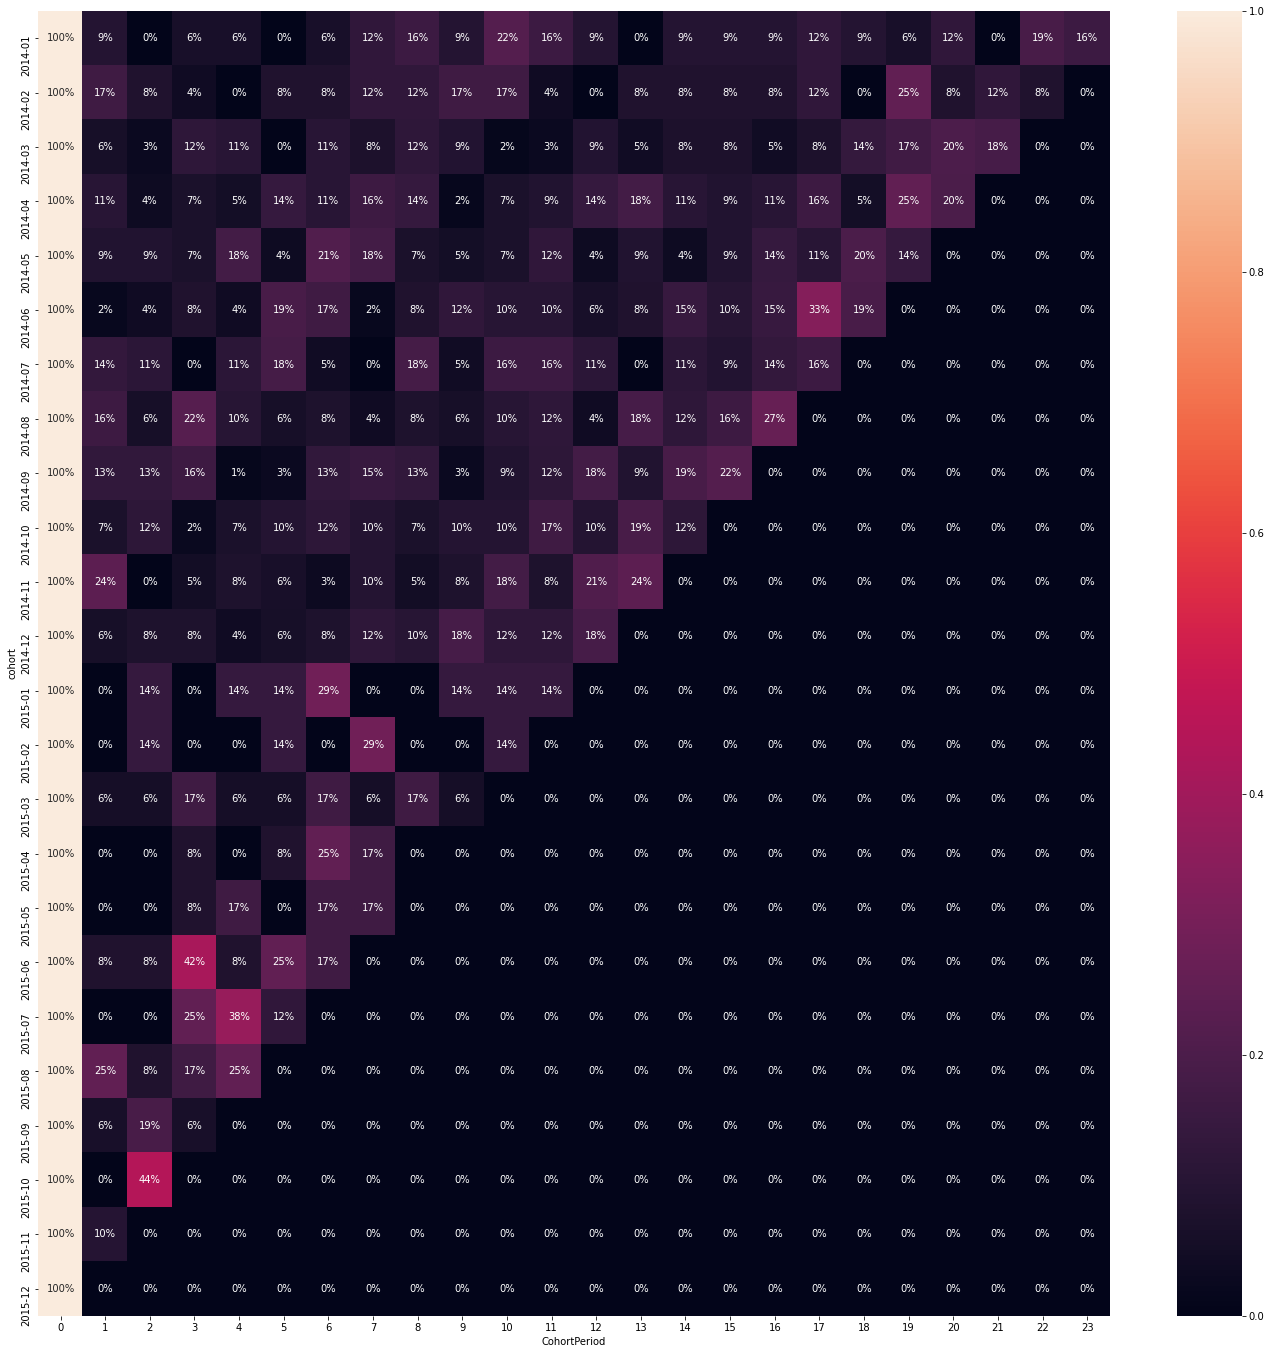

In [445]:
plot_retention_graph(df[two_prev_year_mask])

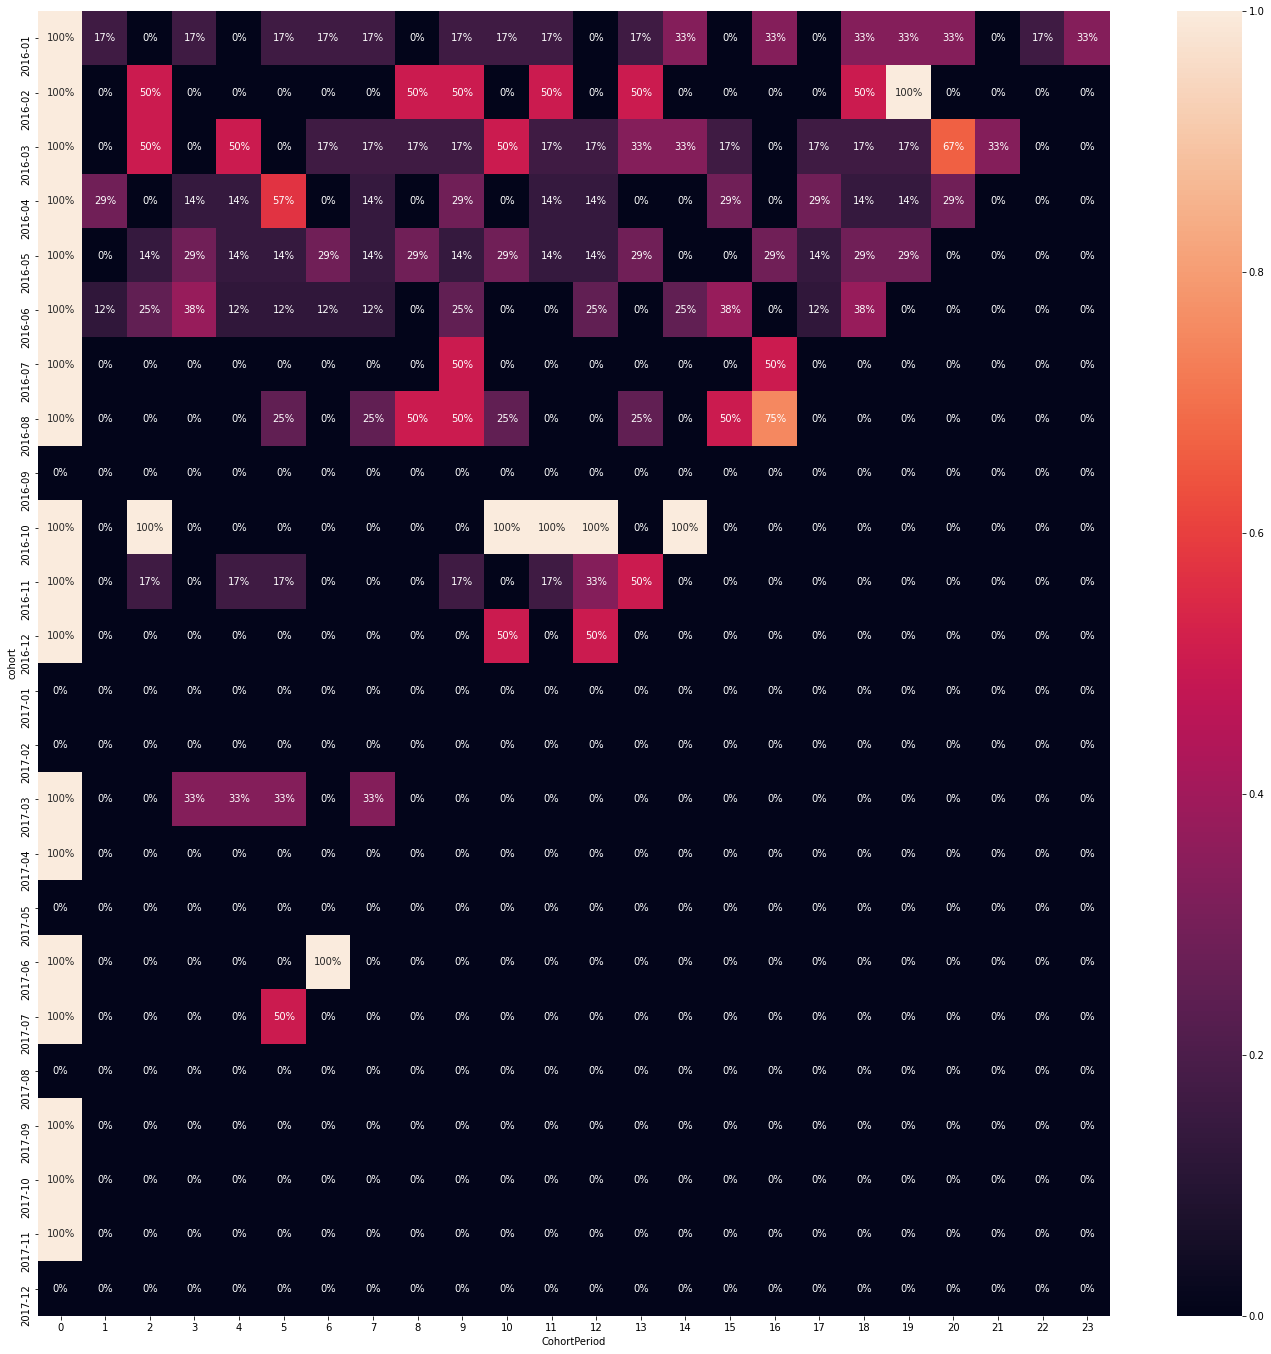

In [446]:
plot_retention_graph(df[two_curr_year_mask])

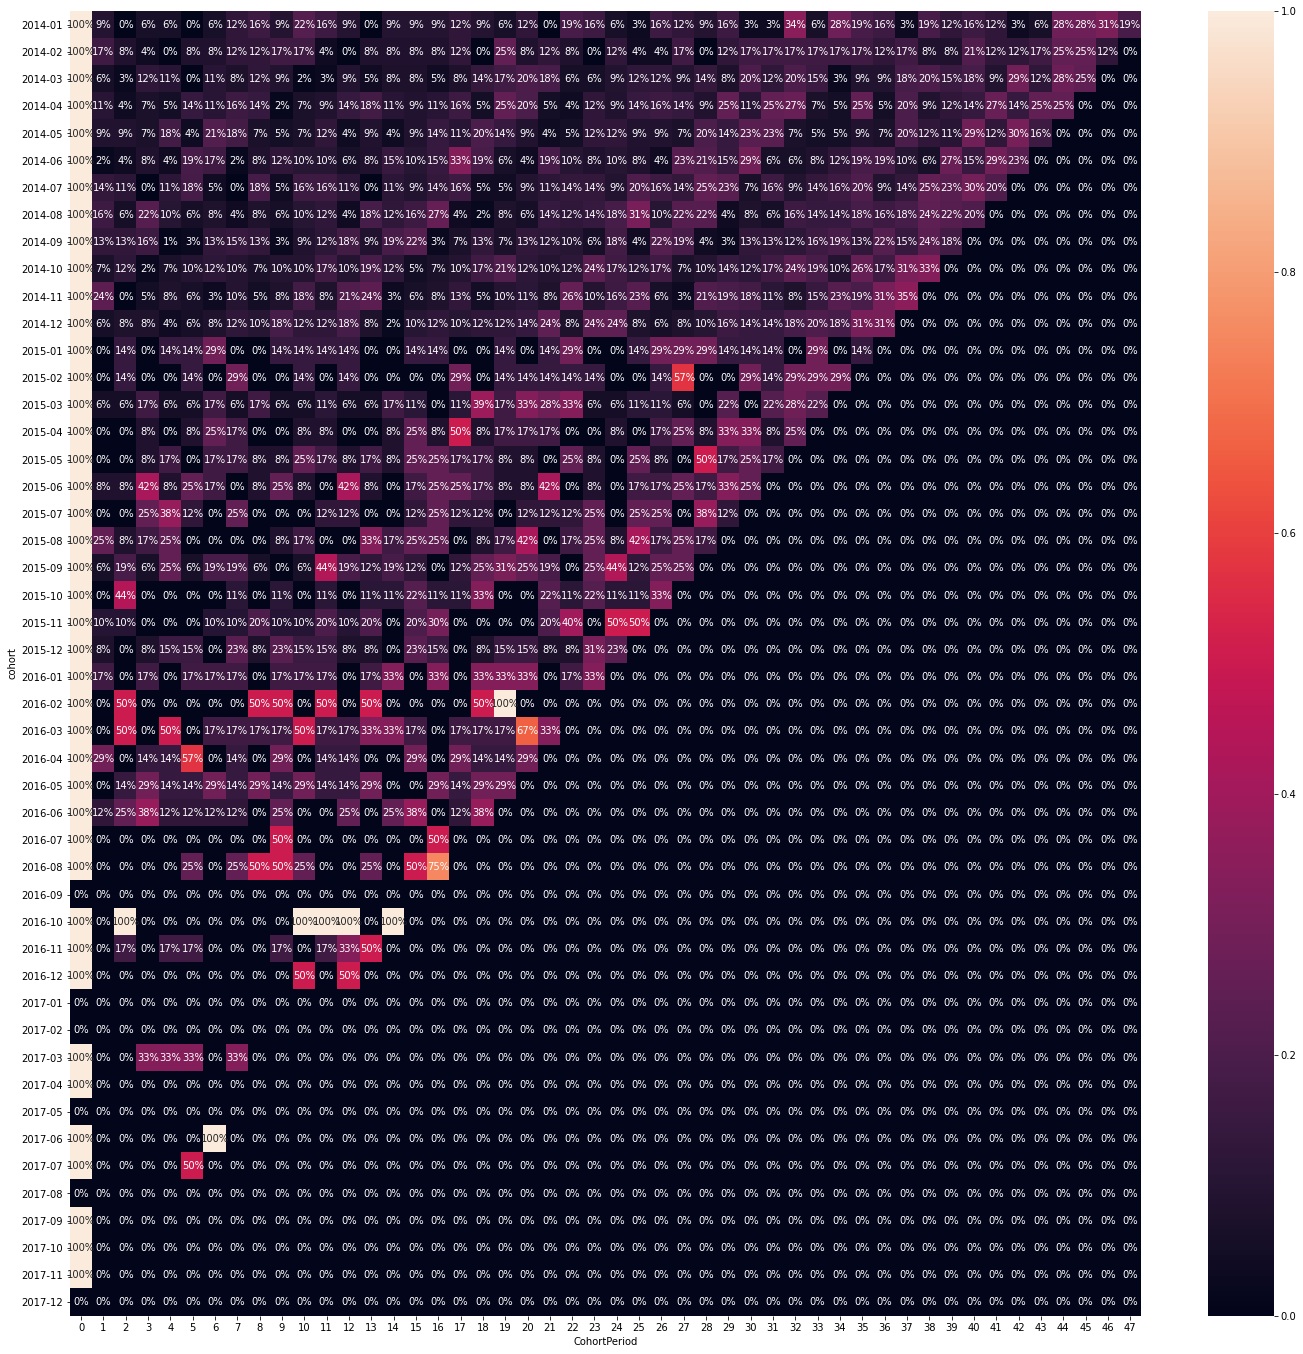

In [447]:
plot_retention_graph(df)

### Выводы:
1. Прибыль в конце 2017 года (то есть сейчас) слабо обусловлена притоком новых пользователей.
2. Более старые когорты (2014 года) наращивают не теряют своей активности.
3. Есть большие проблемы с привлечением новых клиентов.
4. Данных для 2017 года очень мало, сложно сделать верный вывод.
5. Нет причин думать, что отток увеличился, потому как старые когорты дают основной вклад.